In [128]:
# pandas and numpy for data manipulation
import pandas as pd
import numpy as np

In [129]:
# pymc3 for Bayesian Inference, pymc built on t
import pymc3 as pm
import theano.tensor as tt
import scipy
from scipy import optimize

In [239]:
df = pd.read_csv(r'C:\Projekty\ekonometria_bayesowska\flats_data.csv')

In [240]:
df

,size_sqmeters,decorated,no_rooms,price,type_of_building,market,district,floor_no,line_distance,price_per_sqmet
0,79,Tak,4,585 000,BLOK,wtórny,Wesoła,4.0,16.136118,7405.063291
1,70,Tak,3,599 000,BLOK,wtórny,Bemowo,1.0,7.234459,8557.142857
2,116,Tak,5,649 000,APARTAMENTOWIEC,wtórny,Białołęka,2.0,10.785620,5594.827586
3,50,Nie,2,430 000,BLOK,wtórny,Białołęka,8.0,10.395828,8600.000000
4,75,Nie,4,420 000,OTHER,pierwotny,Wawer,0.0,12.561073,5600.000000
...,...,...,...,...,...,...,...,...,...,...
2800,37,Nie,2,410 000,BLOK,wtórny,Żoliborz,9.0,3.934595,11081.081081
2801,44,Tak,2,390 000,BLOK,wtórny,Włochy,0.0,7.948380,8863.636364
2802,46,Nie,3,425 000,BLOK,wtórny,Targówek,1.0,7.124676,9239.130435
2803,54,Tak,3,390 000,BLOK,wtórny,Białołęka,0.0,10.886751,7222.222222


In [241]:
df.groupby("type_of_building").count()

,size_sqmeters,decorated,no_rooms,price,market,district,floor_no,line_distance,price_per_sqmet
type_of_building,,,,,,,,,
APARTAMENTOWIEC,668,668,668,668,668,667,650,668,668
BLOK,1552,1552,1552,1552,1552,1541,1529,1552,1552
KAMIENICA,339,339,339,339,339,339,336,339,339
OTHER,246,246,246,246,246,241,210,246,246


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002089A0E41D0>,
      dtype=object)

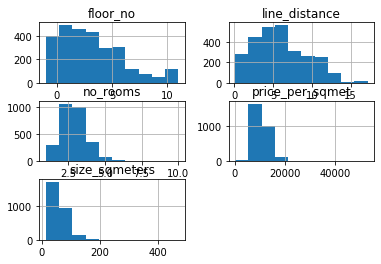

In [242]:
df.hist()

In [243]:
df = pd.get_dummies(df, prefix='building', columns=['type_of_building']).drop('building_BLOK', axis=1)

In [244]:
df = pd.get_dummies(df, prefix='decorated', columns=['decorated']).drop('decorated_Nie', axis=1)
df = pd.get_dummies(df, prefix='market', columns=['market']).drop('market_wtórny', axis=1)
#df = pd.get_dummies(df, prefix='district', columns=['district']).drop('district_Śródmieście', axis=1)

In [245]:
result=list(df.columns)
result.remove("price_per_sqmet")
result.remove('price')
result.remove('district')

In [246]:
variables='+'.join(result)
variables

'size_sqmeters+no_rooms+floor_no+line_distance+building_APARTAMENTOWIEC+building_KAMIENICA+building_OTHER+decorated_Tak+decorated_Unknown+market_pierwotny'

In [247]:
print(result)

['size_sqmeters', 'no_rooms', 'floor_no', 'line_distance', 'building_APARTAMENTOWIEC', 'building_KAMIENICA', 'building_OTHER', 'decorated_Tak', 'decorated_Unknown', 'market_pierwotny']


In [248]:
N_SAMPLES = 50

In [251]:
with pm.Model() as flats_model:
    # Three parameters to sample
    pm.glm.GLM.from_formula('price_per_sqmet ~ ' + variables, df)
    step = pm.Metropolis()

    trace = pm.sample(50000, step=step, cores=4)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [sd]
>Metropolis: [market_pierwotny]
>Metropolis: [decorated_Unknown]
>Metropolis: [decorated_Tak]
>Metropolis: [building_OTHER]
>Metropolis: [building_KAMIENICA]
>Metropolis: [building_APARTAMENTOWIEC]
>Metropolis: [line_distance]
>Metropolis: [floor_no]
>Metropolis: [no_rooms]
>Metropolis: [size_sqmeters]
>Metropolis: [Intercept]
Sampling 4 chains: 100%|████████████████████████████████████████████████████| 202000/202000 [13:51<00:00, 51.50draws/s]
The estimated number of effective samples is smaller than 200 for some parameters.


In [250]:
pm.summary(trace)

c:\Anaconda\lib\site-packages\pymc3\stats.py:982: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  axis=1, join_axes=[dforg.index])


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
Intercept,9756.804278,3646.642162,364.511755,2009.592370,13038.460812,5.910615,1.000218
size_sqmeters,7.190767,5.759418,0.509581,-2.770739,14.600397,35.553019,1.011198
no_rooms,-213.467860,544.760733,54.188532,-830.781241,914.668849,5.953265,0.999970
floor_no,152.268338,144.801677,14.372655,-4.808237,470.275182,6.286833,1.001479
line_distance,-303.514632,158.570224,15.784704,-464.210163,23.751335,6.381941,1.000800
building_APARTAMENTOWIEC,2025.657421,281.213106,25.030894,1598.585596,2609.766489,7.251989,1.001183
building_KAMIENICA,2234.674419,966.462841,95.670856,1095.897045,4241.049222,6.371262,1.004890
building_OTHER,557.441150,317.078008,24.463133,45.085339,1254.000952,9.840912,1.000664
decorated_Tak,1735.259138,734.455896,72.825179,900.338079,3280.072726,6.110241,1.000693
decorated_Unknown,1174.304534,718.678033,70.404632,316.269113,2634.459719,5.785252,0.999988


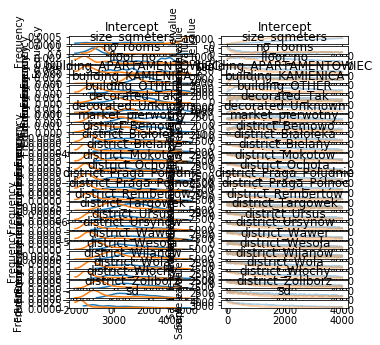

In [202]:
pm.traceplot(trace,figsize=(5,5));

In [207]:
accept = np.sum(trace['size_sqmeters'][1:] != trace['size_sqmeters'][:-1])
print("Acceptance Rate: ", accept/trace['size_sqmeters'].shape[0])

Acceptance Rate:  0.49625


In [185]:
import matplotlib.pyplot as plt

In [189]:
scores=pm.geweke(trace)

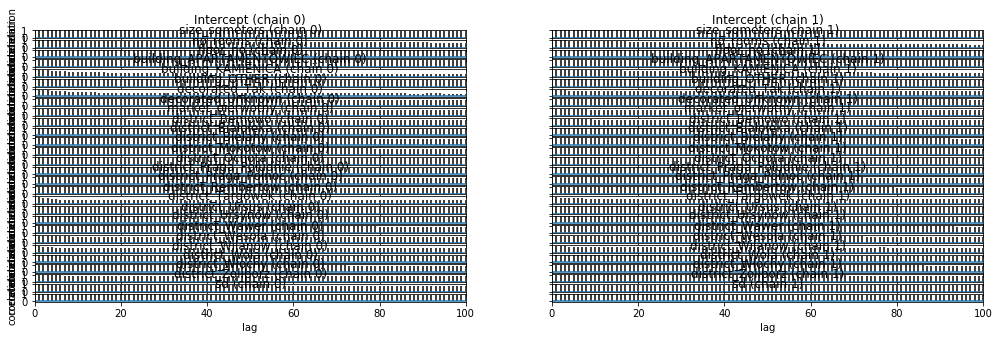

In [208]:
pm.plots.autocorrplot(trace,figsize=(17,5));

In [235]:
def plot_geweke(trace, var):
    score=pm.geweke(trace, first=0.1, last=0.5, intervals=20)
    print(score[0][var][:,1])
    plt.scatter(score[0][var][:,0],score[0][var][:,1], marker = 'o', s=100)
    plt.axhline(-1.98, c='r')
    plt.axhline(1.98, c='r')
    plt.ylim(-2.5,2.5)
    plt.xlim(0-10,.5*trace[var].shape[0]/2+10)
    plt.title('Geweke Plot Comparing first 10% and Slices of the Last 50% of Chain\nDifference in Mean Z score')
    plt.show()

[-11.55185661 -11.05495657 -10.32051241 -10.19985913 -10.26536813
 -10.10890593 -10.03410027 -11.02915716 -11.96956198 -10.81832553
  -9.34620005  -7.97481093  -7.20493566  -8.04460668  -8.91617169
  -7.90077425  -5.60947555  -5.79748623  -6.21437618  -5.04321242]


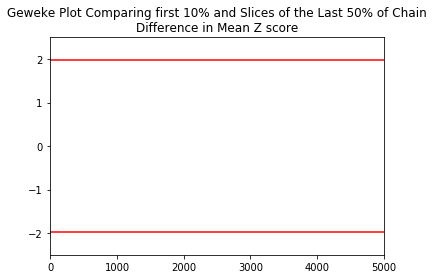

In [236]:
plot_geweke(trace, 'Intercept')